In [1]:
import torch

In [33]:
M = 100
z_dim = 2
eps = 1
L = 1
p_samples = torch.randn(M, z_dim)
q_samples = torch.randn(M, z_dim)
# (M_p, M_q)
C = torch.sum(p_samples**2, dim=1, keepdims=True) - 2*p_samples@q_samples.T + torch.sum(q_samples.T**2, dim=0, keepdims=True)
K = torch.exp(-C/eps)
u = torch.ones(M)
print(K)
for _ in range(L):
    v = 1 / K.T@u
    u = 1 / K@v

print(u)
print(v)
R_star = torch.diag(u)@K@torch.diag(v)
print(R_star)

tensor([[4.1289e-02, 1.0376e-02, 2.0981e-02,  ..., 9.9437e-04, 2.2618e-03,
         2.0482e-02],
        [6.3048e-01, 4.0717e-02, 1.5835e-01,  ..., 3.8216e-01, 7.0827e-01,
         2.4834e-02],
        [4.9124e-01, 7.0598e-01, 1.4716e-02,  ..., 8.4619e-03, 3.2910e-01,
         6.9964e-01],
        ...,
        [6.6587e-01, 6.8147e-02, 2.9730e-01,  ..., 9.6032e-02, 1.5126e-01,
         7.5421e-02],
        [3.5681e-02, 3.8175e-05, 4.8127e-01,  ..., 7.2404e-01, 1.0696e-02,
         2.4438e-05],
        [5.9854e-01, 5.4695e-01, 1.7890e-02,  ..., 2.3836e-02, 7.3757e-01,
         4.2019e-01]])
tensor([3.6209e+17, 9.6043e+21, 1.8376e+21, 1.4544e+20, 1.6106e+18, 3.8585e+17,
        3.1624e+22, 2.5832e+19, 4.8880e+19, 9.1242e+21, 1.3611e+30, 3.9970e+19,
        1.0278e+22, 2.4283e+18, 6.6767e+18, 1.4596e+21, 5.0077e+20, 6.4218e+18,
        1.3533e+20, 2.9941e+19, 8.9704e+23, 2.4209e+31, 4.2672e+23, 5.8941e+22,
        1.5407e+20, 8.4672e+17, 1.5637e+23, 3.3610e+20, 1.6884e+19, 1.1965e+18,
    

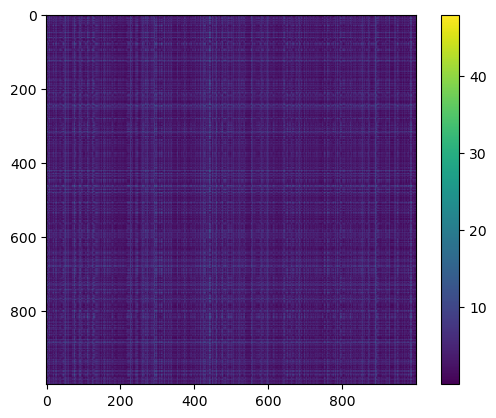

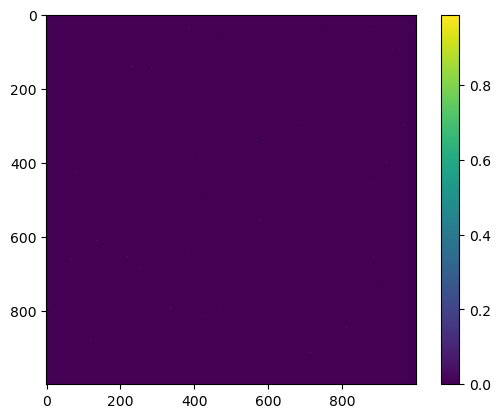

In [14]:
import matplotlib.pyplot as plt
plt.imshow(C.data.cpu().numpy())
plt.colorbar()
plt.show()

import matplotlib.pyplot as plt
plt.imshow(K.data.cpu().numpy())
plt.colorbar()
plt.show()